In [70]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd=r'C:\\Program Files\\Tesseract-OCR\\tesseract'

In [71]:
import cv2
# Import PyTorch Library
import torch
from torch import nn

# Import external libraries
import argparse
import numpy as np
import re
#import opencv_wrapper as cvw
from skimage.filters import threshold_local
import json
import random
from string import ascii_uppercase, digits, punctuation
import colorama
import regex
import matplotlib.pyplot as plt

# Load the image - 1

In [108]:
img = cv2.imread("19.jpg")
text = pytesseract.image_to_string(img)
text

"Invoice No. 144 Dated 19-Mar-2021\nRef. No.\n\nMAA MANASA PAPER CENTRE\n\nBASIRHAT R.N. ROAD,NORTH 24 PARGANAS, 743411\nWest Bengal - 743411, India\nGSTIN/UIN: 19CBBPN1538E1ZT\nState Name : West Bengal, Code : 19\nContact : 8001780050, 7602929598\nE-Mail : nilaynathOO@gmail.com\n\nTAX INVOICE\nMMPC\n\nParty : SP UDYOG\n411/447 BIJOY CHANDRA DAS ROAD,SAINPALA,BASIRHAT\nNORTH 24 PARGANAS, 743411\nWest Bengal - 743411, India\n\nGSTIN/UIN : 19AUKPP8322N1ZU\n\nPAN/IT No\n\nState Name : West Bengal, Code : 19\n\nDespatch Document No. Delivery Note\nSELF LIFTED dt. 19-Mar-2021\n\nPayment Terms\nNEFT\n\nDescription of Goods HSN/SAC Quantity Amount\n\nB2B LEGAL PAPER 250 REAMS 191.96 | REANS 47,990.00\n\n2,879.40\n2,879.40\nRounding Off 0.20\n\nBill Details:\nOn Account 53,749.00 Dr\n\n= 53,749.00\nAmount Chargeable (in words) EEO.\n\nINR Fifty Three Thousand Seven Hundred Forty Nine Only\n\nHSN/SAC Taxable Central Tax Total\nValue Amount | Tax Amount\n\n47,990.00 2,879.40 2,879.40\nTax Amount

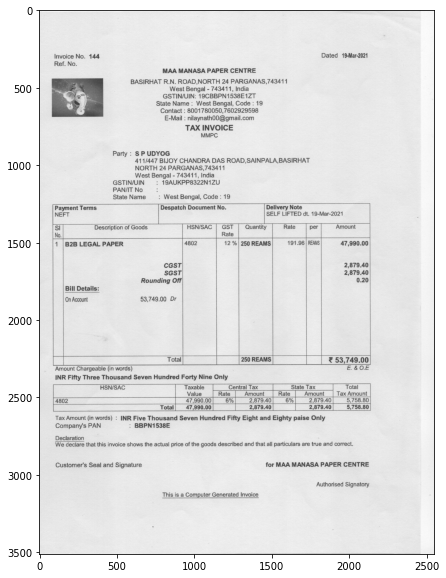

In [109]:
img = '19.jpg'
img = cv2.imread(img)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [110]:
print(text)

Invoice No. 144 Dated 19-Mar-2021
Ref. No.

MAA MANASA PAPER CENTRE

BASIRHAT R.N. ROAD,NORTH 24 PARGANAS, 743411
West Bengal - 743411, India
GSTIN/UIN: 19CBBPN1538E1ZT
State Name : West Bengal, Code : 19
Contact : 8001780050, 7602929598
E-Mail : nilaynathOO@gmail.com

TAX INVOICE
MMPC

Party : SP UDYOG
411/447 BIJOY CHANDRA DAS ROAD,SAINPALA,BASIRHAT
NORTH 24 PARGANAS, 743411
West Bengal - 743411, India

GSTIN/UIN : 19AUKPP8322N1ZU

PAN/IT No

State Name : West Bengal, Code : 19

Despatch Document No. Delivery Note
SELF LIFTED dt. 19-Mar-2021

Payment Terms
NEFT

Description of Goods HSN/SAC Quantity Amount

B2B LEGAL PAPER 250 REAMS 191.96 | REANS 47,990.00

2,879.40
2,879.40
Rounding Off 0.20

Bill Details:
On Account 53,749.00 Dr

= 53,749.00
Amount Chargeable (in words) EEO.

INR Fifty Three Thousand Seven Hundred Forty Nine Only

HSN/SAC Taxable Central Tax Total
Value Amount | Tax Amount

47,990.00 2,879.40 2,879.40
Tax Amount (in words) : INR Five Thousand Seven Hundred Fifty E

# Extract GSTIN

In [111]:
GSTIN_REG = re.compile(r'[0-9]{2}[A-Z]{5}[0-9]{4}[A-Z]{1}[A-Z0-9]{1}Z{1}[A-Z0-9]{1}')
r=re.findall(GSTIN_REG, text)
print(r)

['19CBBPN1538E1ZT', '19AUKPP8322N1ZU']


# Extract PHONE NO.

In [112]:
PHONE_REG = re.compile(r'\d{10}')
r1=re.findall(PHONE_REG, text)
print(r1)

['8001780050', '7602929598']


# Extract EMAIL

In [113]:
EMAIL_REG = re.compile(r'[a-z0-9A-Z\._]+@[a-z0-9\.\-+_]+\.[a-z]+')
r2=re.findall(EMAIL_REG, text)
print(r2)

['nilaynathOO@gmail.com']


# Extract Address 

In [114]:
ADDRESS_REG = re.compile(r'MAA.*\n.*\n([^A][a-zA-Z0-9].*\n.*)', re.IGNORECASE)
r4=re.findall(ADDRESS_REG, text)
print(r4)

['BASIRHAT R.N. ROAD,NORTH 24 PARGANAS, 743411\nWest Bengal - 743411, India']


# Extract PAN NO.

In [116]:
PAN_REG = re.compile(r'[A-Z]{5}[0-9]{4}[A-Z]{1}')
r5=re.findall(PAN_REG, text)
print(r5)

['CBBPN1538E', 'AUKPP8322N']
